In [110]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()
sns.set_style("white")


In [111]:
import plotly.express as px

In [112]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [113]:
df_train = data_train.copy()
df_test = data_test.copy()

# Analyse de forme

In [114]:
print(f"shape train : {df_train.shape}\n shape test : {df_test.shape}")
df_train.head()

shape train : (3116945, 22)
 shape test : (2077964, 21)


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [115]:
df_train.dtypes.value_counts()

object     18
float64     3
int64       1
Name: count, dtype: int64

In [116]:
(df_train.isna().sum()/df_train.shape[0]).sort_values(ascending=False)

veil-type               0.948843
spore-print-color       0.914255
stem-root               0.884527
veil-color              0.879370
stem-surface            0.635514
gill-spacing            0.403740
cap-surface             0.215282
gill-attachment         0.168093
ring-type               0.041348
gill-color              0.000018
habitat                 0.000014
cap-shape               0.000013
stem-color              0.000012
has-ring                0.000008
cap-color               0.000004
does-bruise-or-bleed    0.000003
cap-diameter            0.000001
class                   0.000000
id                      0.000000
stem-width              0.000000
stem-height             0.000000
season                  0.000000
dtype: float64

# Analyse du fond
### Visualisation et élimination des colonnes inutiles

In [117]:
df_train.drop(columns='id', inplace=True)  # La colonne id n'a pas d'interêt dans le test set, pas d'influence sur la toxicité


<Axes: >

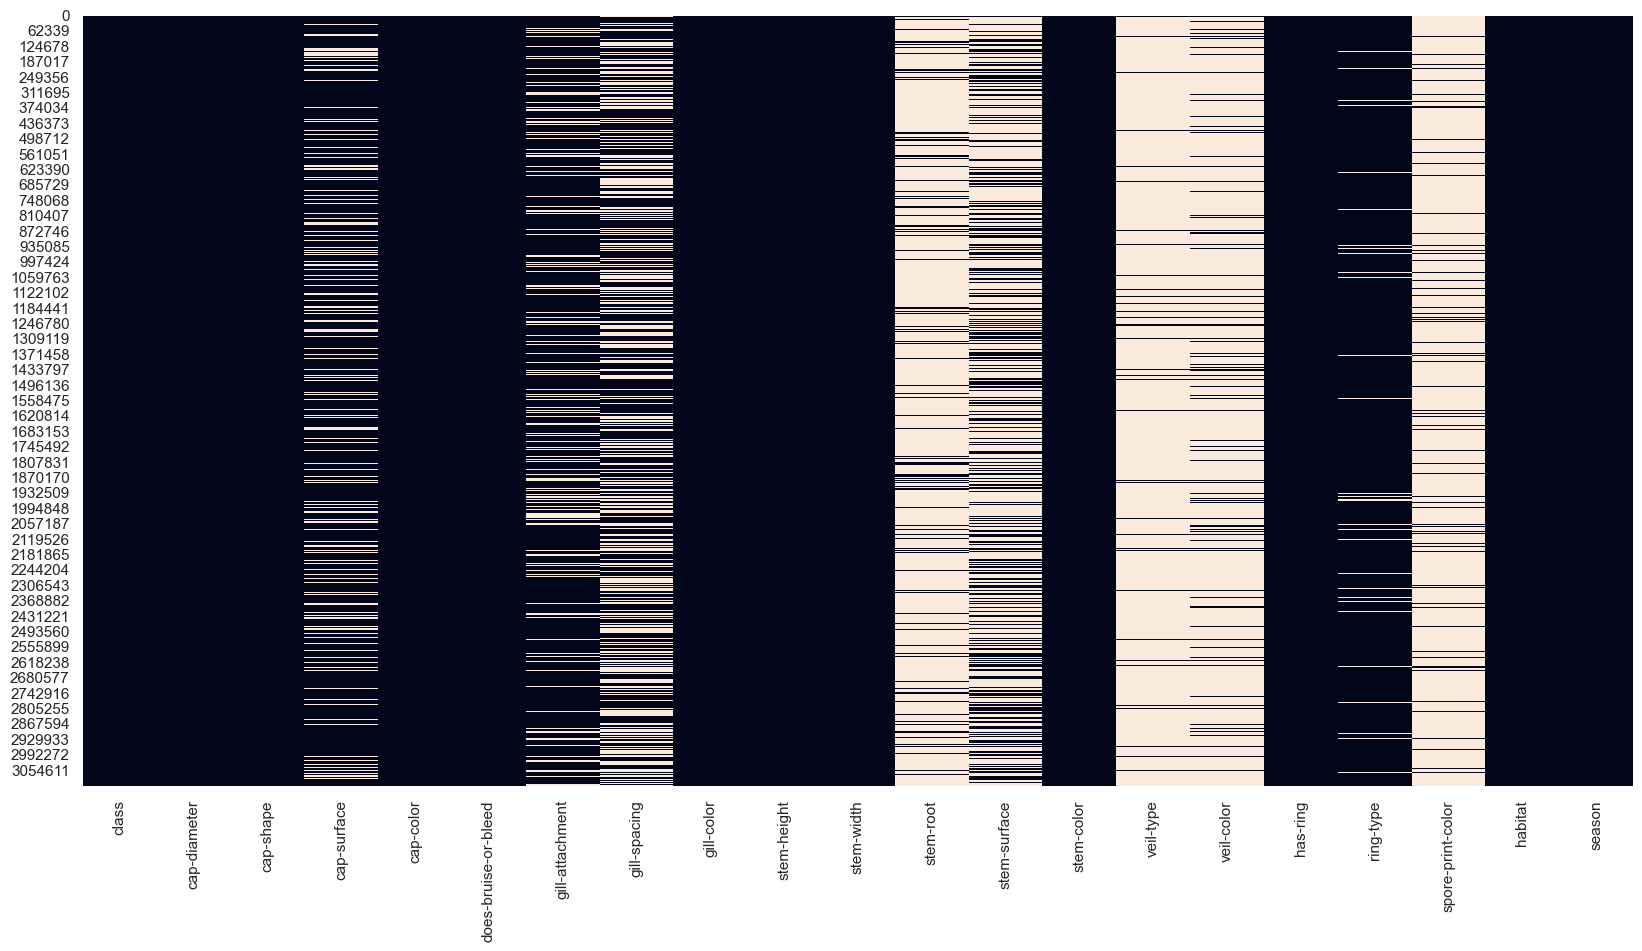

In [118]:
#plt.figure(figsize=(20,10))
#sns.heatmap(df_train.isna(), cbar=False)

Des valeurs manquantes, certianes pourraient être déduites, à tester

In [119]:
df_train.dtypes.value_counts()

object     18
float64     3
Name: count, dtype: int64

### Analyse de la colonne target

In [120]:
df_train["class"].value_counts(normalize=True)

class
p    0.547137
e    0.452863
Name: proportion, dtype: float64

La répartition toxique / non toxique est proche

### Variables continues

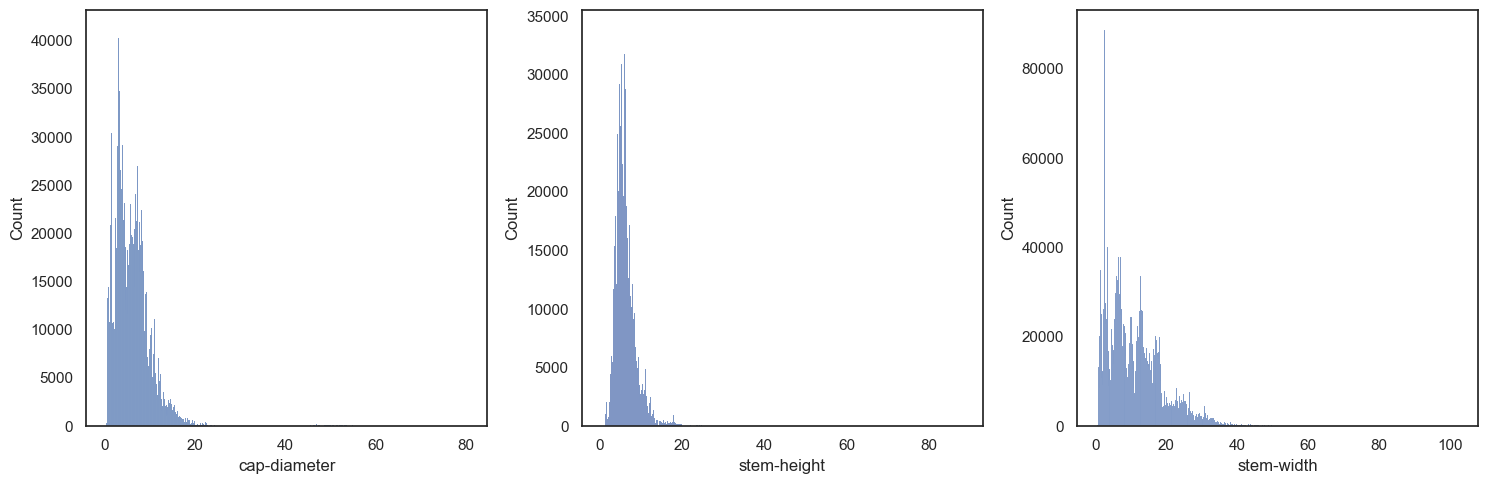

In [121]:
i=1
plt.figure(figsize=(20,5))
for col in df_train.select_dtypes(include=['float']).columns:
    plt.subplot(1, 4, i)
    sns.histplot(data=df_train[col],)
    plt.tight_layout()
    i +=1

### Variables qualitatives

In [133]:
df_train.select_dtypes(include='object')

,class,does-bruise-or-bleed,stem-root,stem-surface,stem-color,has-ring,season
0,e,f,NaN,NaN,w,f,a
1,p,f,NaN,y,o,t,w
2,e,f,NaN,s,n,f,w
3,e,f,NaN,NaN,w,f,u
4,e,f,NaN,NaN,w,f,a
...,...,...,...,...,...,...,...
3116940,e,t,b,NaN,w,t,u
3116941,e,t,NaN,NaN,w,f,u
3116942,p,f,NaN,NaN,y,t,a
3116943,e,t,NaN,y,w,t,u


_ATTENTION : IL Y A DES VALEURS NUMERIQUES ET ALPHABETIQUES MELANGEES (ex : des nombres en str dans grill-color)_

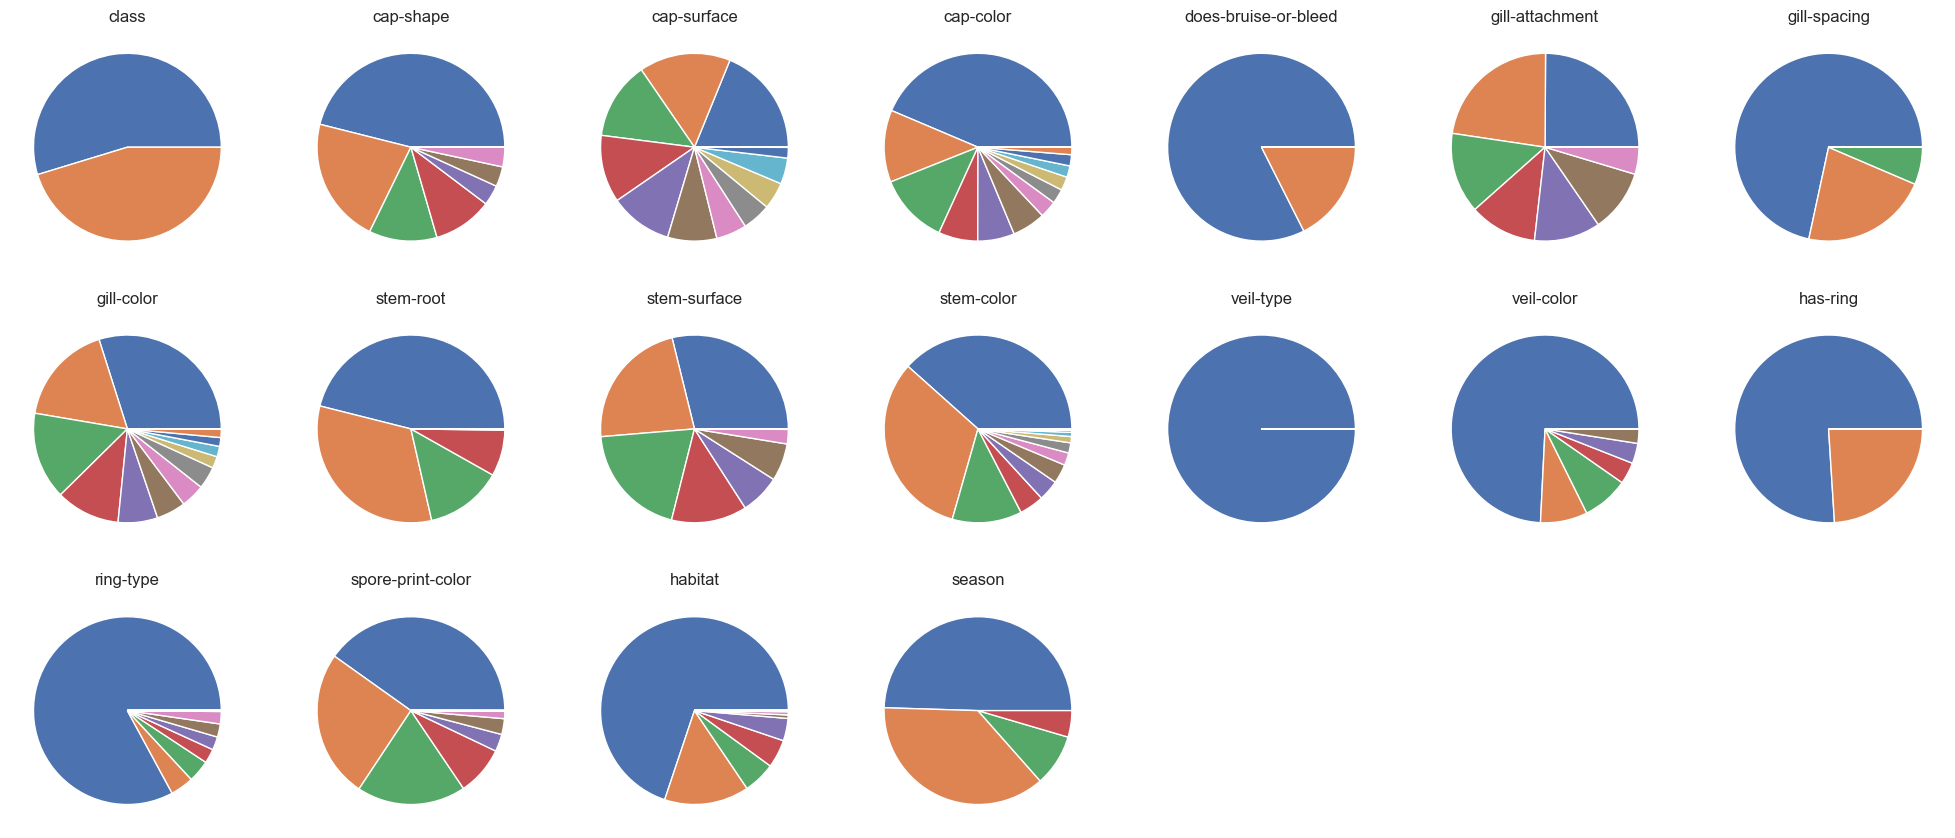

In [123]:
i=1
plt.figure(figsize=(25,25))
for col in df_train.select_dtypes(include='object'):
    plt.subplot(7,7,i)
    plt.pie(df_train[col].value_counts())
    plt.title(f"{col}",)
    i += 1


In [124]:
variable_df = pd.read_csv('mushroom_variables.csv')
variable_df = variable_df.transpose().reset_index()
variable_df.columns = variable_df.loc[0,:]
variable_df.drop(index=0, inplace=True)
variable_df.set_index(variable_df.columns[0], inplace=True)
variable_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
name,,,,,,,,,,,,,,,,,,,,,
role,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,...,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature,Feature
type,Categorical,Categorical,Binary,Categorical,Categorical,Categorical,Categorical,Categorical,Categorical,Categorical,...,Categorical,Categorical,Categorical,Binary,Categorical,Categorical,Categorical,Categorical,Categorical,Categorical
demographic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,"bell=b,conical=c,convex=x,flat=f, knobbed=k,su...","fibrous=f,grooves=g,scaly=y,smooth=s","brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...","bruises=t,no=f","almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...","attached=a,descending=d,free=f,notched=n","close=c,crowded=w,distant=d","broad=b,narrow=n","black=k,brown=n,buff=b,chocolate=h,gray=g, gre...","enlarging=e,tapering=t",...,"fibrous=f,scaly=y,silky=k,smooth=s","brown=n,buff=b,cinnamon=c,gray=g,orange=o, pin...","brown=n,buff=b,cinnamon=c,gray=g,orange=o, pin...","partial=p,universal=u","brown=n,orange=o,white=w,yellow=y","none=n,one=o,two=t","cobwebby=c,evanescent=e,flaring=f,large=l, non...","black=k,brown=n,buff=b,chocolate=h,green=r, or...","abundant=a,clustered=c,numerous=n, scattered=s...","grasses=g,leaves=l,meadows=m,paths=p, urban=u,..."
units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
missing_values,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
description_mod,"['b', 'c', 'x', 'f', 'k', 's']","['f', 'g', 'y', 's']","['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', ...","['t', 'f']","['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's']","['a', 'd', 'f', 'n']","['c', 'w', 'd']","['b', 'n']","['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', ...","['e', 't']",...,"['f', 'y', 'k', 's']","['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y']","['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y']","['p', 'u']","['n', 'o', 'w', 'y']","['n', 'o', 't']","['c', 'e', 'f', 'l', 'n', 'p', 's', 'z']","['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y']","['a', 'c', 'n', 's', 'v', 'y']","['g', 'l', 'm', 'p', 'u', 'w', 'd']"


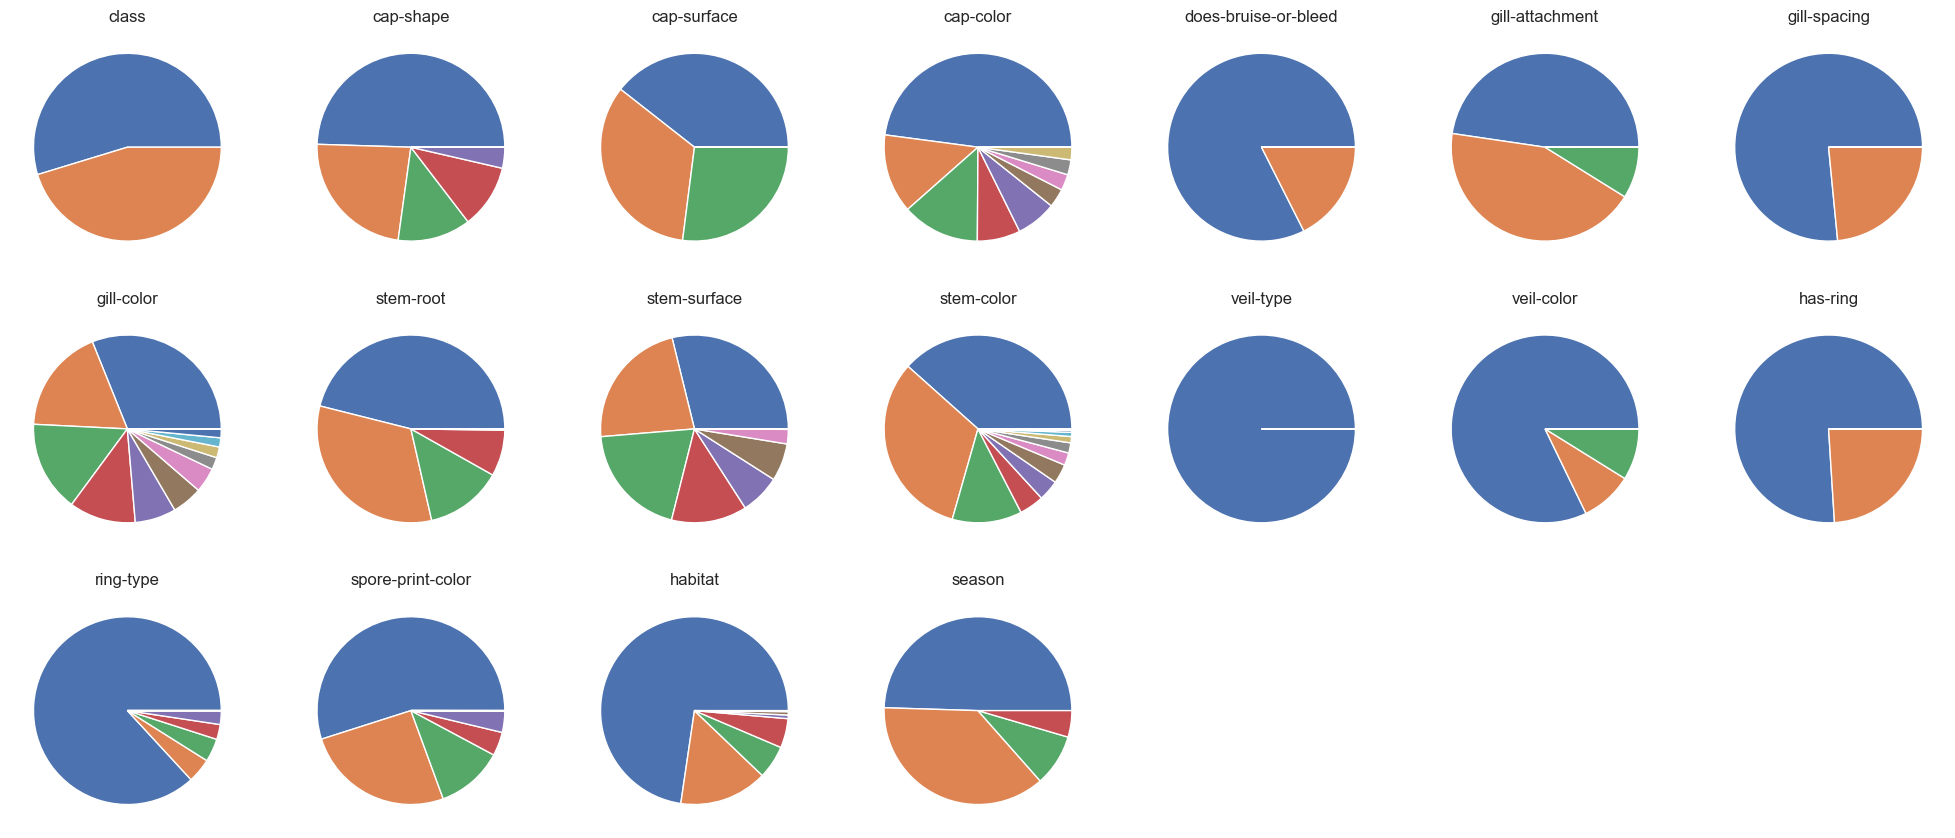

In [144]:
df_train = data_train.copy()
def verif_cat(liste, var):
    if not var in liste:
        return np.nan
    
list_cat = [cat for cat in variable_df.columns if cat in df_train.columns]
for cat in list_cat:
    liste = variable_df.loc[(variable_df.index == "description_mod"), cat].tolist()[0]
    df_train[cat] = df_train[cat].apply(lambda x: np.nan if str(x) not in liste else str(x))
    
    
i=1
plt.figure(figsize=(25,25))
for col in df_train.select_dtypes(include='object'):
    plt.subplot(7,7,i)
    plt.pie(df_train[col].value_counts())
    plt.title(f"{col}",)
    i += 1

In [130]:

(df_train.isna().sum()/df_train.shape[0]).sort_values(ascending=False)

veil-type               0.948843
spore-print-color       0.914255
stem-root               0.884527
veil-color              0.879370
stem-surface            0.635514
gill-spacing            0.403740
cap-surface             0.215282
gill-attachment         0.168093
ring-type               0.041348
gill-color              0.000018
habitat                 0.000014
cap-shape               0.000013
stem-color              0.000012
has-ring                0.000008
cap-color               0.000004
does-bruise-or-bleed    0.000003
cap-diameter            0.000001
class                   0.000000
id                      0.000000
stem-width              0.000000
stem-height             0.000000
season                  0.000000
dtype: float64

In [127]:
df_train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,NaN,NaN,NaN,f,NaN,NaN,NaN,...,NaN,NaN,w,NaN,NaN,f,NaN,NaN,NaN,a
1,1,p,4.51,NaN,NaN,NaN,f,NaN,NaN,NaN,...,NaN,y,o,NaN,NaN,t,NaN,NaN,NaN,w
2,2,e,6.94,NaN,NaN,NaN,f,NaN,NaN,NaN,...,NaN,s,n,NaN,NaN,f,NaN,NaN,NaN,w
3,3,e,3.88,NaN,NaN,NaN,f,NaN,NaN,NaN,...,NaN,NaN,w,NaN,NaN,f,NaN,NaN,NaN,u
4,4,e,5.85,NaN,NaN,NaN,f,NaN,NaN,NaN,...,NaN,NaN,w,NaN,NaN,f,NaN,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,NaN,NaN,NaN,t,NaN,NaN,NaN,...,b,NaN,w,NaN,NaN,t,NaN,NaN,NaN,u
3116941,3116941,e,10.88,NaN,NaN,NaN,t,NaN,NaN,NaN,...,NaN,NaN,w,NaN,NaN,f,NaN,NaN,NaN,u
3116942,3116942,p,7.82,NaN,NaN,NaN,f,NaN,NaN,NaN,...,NaN,NaN,y,NaN,NaN,t,NaN,NaN,NaN,a
3116943,3116943,e,9.45,NaN,NaN,NaN,t,NaN,NaN,NaN,...,NaN,y,w,NaN,NaN,t,NaN,NaN,NaN,u


In [140]:
[cat for cat in variable_df.columns if cat in df_train.columns]

['cap-shape',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'veil-type',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'habitat']

In [129]:
df_train[""]

True